In [160]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from pathlib import Path
import IPython.display as ipd
from scipy import signal
from scipy.fft import fft, ifft, fftshift

In [2]:
# file = Path("../instruments/YDP-GrandPiano-20160804/samples/piano057v095.wav")
# file = Path("../instruments/YDP-GrandPiano-20160804/samples/piano057v095.wav")
# file2 = Path("../instruments/YDP-GrandPiano-20160804/samples/piano048v105.wav")
# midi_num = 21
# print(librosa.midi_to_note(midi_num))

files = [Path(f"../instruments/SalC5Light2/samples/A{i}v1L.wav") for i in range(0, 8)]
n = len(files)
sr = 22050
ys = [
    librosa.load(file)[0]
    for file in files
]

(1025, 626)
(1025, 567)
(1025, 395)
(1025, 385)
(1025, 362)
(1025, 256)
(1025, 166)
(1025, 86)


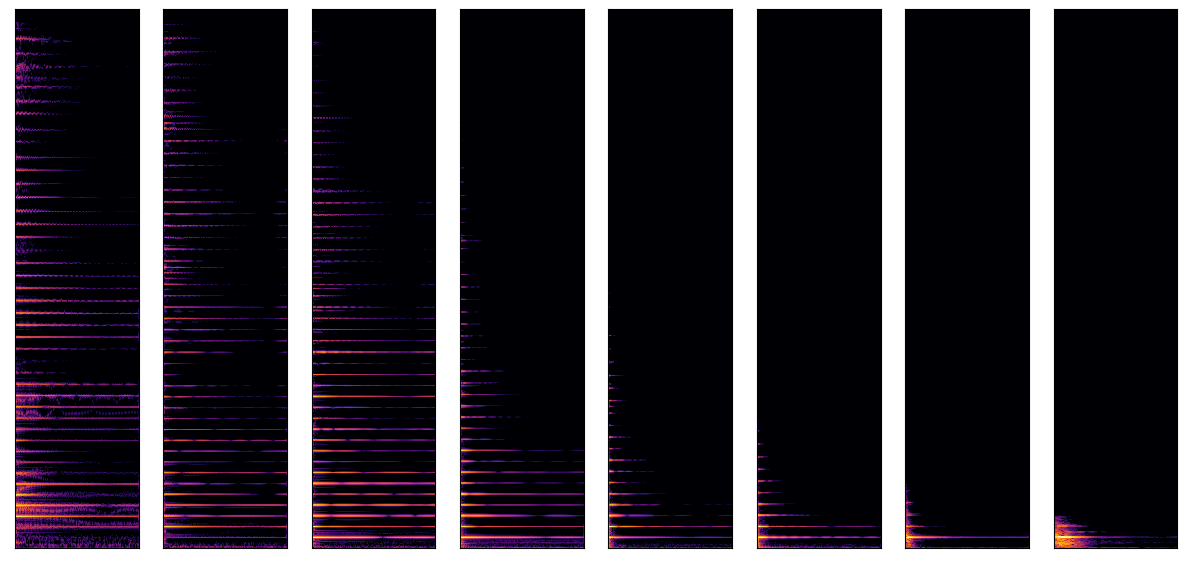

In [444]:
fig, ax = plt.subplots(1, n, figsize=[15, 7])
y_listen = []
specs = []
for i in range(n):
    plt.sca(ax[i])
    y = ys[i]
    y = librosa.effects.pitch_shift(y, sr=sr, n_steps=-12*(i-3))
    y = y#[:10*sr]
    y_listen.append(y)
    spec = librosa.stft(y)
    print(spec.shape)
    # spec = librosa.feature.melspectrogram(y = y)
    spec = librosa.amplitude_to_db(np.abs(spec), ref=1e-12)
    # spec = np.abs(spec)
    specs.append(spec)
    librosa.display.specshow(spec, cmap='inferno', vmin=70, vmax=140.0)
    # plt.pcolor(spec[:spec.shape[0]//(2**(5-i))])
    # plt.pcolor(spec)
    # librosa.display.specshow(spec[::2**i], cmap='inferno', vmin=70, vmax=140.0)
    # plt.colorbar()

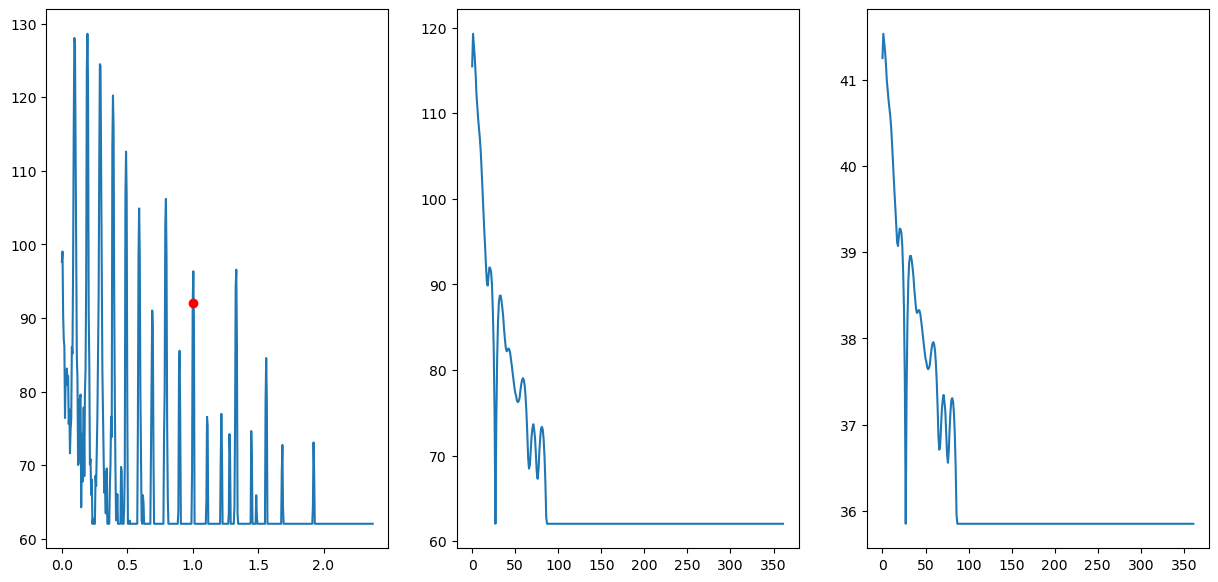

In [472]:
from skimage.filters import gaussian
fig, ax = plt.subplots(1, 3, figsize=[15, 7])
i_file = 4
I = 20*10 + 10
# I = int(np.argmax(specs[i_file][:, 20]))
ax[0].plot(np.arange(500)/I, specs[i_file][:500, 20])
ax[0].plot(1.0, specs[i_file][I, 20], 'or')
# ax[1].plot(gaussian(specs[i_file][I, :], 1))
ax[1].plot(specs[i_file][I, :])
ax[2].plot(librosa.amplitude_to_db(specs[i_file][I, :]))

# plt.plot(gaussian(specs[0][20], 5))

In [426]:
ipd.Audio(y_listen[i_file], rate=sr)

In [257]:
ipd.Audio(librosa.effects.time_stretch(ys[0], rate=2.0), rate=sr)

In [258]:
librosa.resample(ys[0], orig_sr=sr, target_sr=2*sr)

640870

In [285]:
ipd.Audio(librosa.resample(ys[-1], orig_sr=sr, target_sr=2.0*sr), rate=sr)

In [262]:
len(librosa.resample(ys[0], orig_sr=sr, target_sr=0.5*sr))

160218

In [279]:
out = librosa.resample(ys[0], orig_sr=sr, target_sr=0.5*sr)
out2 = librosa.resample(out, orig_sr=0.5*sr, target_sr=sr)

In [280]:
len(out), len(out2)

(160218, 320436)

In [281]:
ipd.Audio(ys[0], rate=sr)

In [282]:
ipd.Audio(out2, rate=sr)